In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [348]:
import os

In [349]:
os.getcwd()

'C:\\Users\\User'

In [3]:
df =pd.read_csv("full_orders.csv")
df.head(5)

,order_dt,order_count
0,8/21/2021,2
1,8/23/2021,6
2,8/24/2021,5
3,8/25/2021,12
4,8/26/2021,1


In [351]:
df.tail(5)

,order_dt,order_count
137,1/6/2022,212
138,1/7/2022,231
139,1/8/2022,221
140,1/9/2022,187
141,1/10/2022,191


In [352]:
df.shape

(142, 2)

In [353]:
df["order_dt"] = pd.to_datetime(df["order_dt"],infer_datetime_format=True)

In [354]:
df= df.set_index(["order_dt"])

In [355]:
from datetime import datetime
df.tail(5)

,order_count
order_dt,
2022-01-06,212
2022-01-07,231
2022-01-08,221
2022-01-09,187
2022-01-10,191


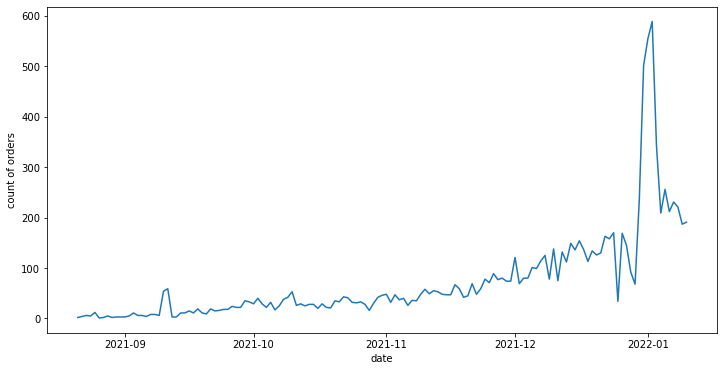

In [356]:
plt.figure(figsize=(12,6))
plt.xlabel("date")
plt.ylabel("count of orders")
plt.plot(df)
plt.show()

In [357]:
mv_avg_3 = df.rolling(window = 3).mean()
mv_std_3 = df.rolling(window = 3).std()

print(mv_avg_3,mv_std_3)


            order_count
order_dt               
2021-08-21          NaN
2021-08-23          NaN
2021-08-24     4.333333
2021-08-25     7.666667
2021-08-26     6.000000
...                 ...
2022-01-06   225.666667
2022-01-07   233.000000
2022-01-08   221.333333
2022-01-09   213.000000
2022-01-10   199.666667

[142 rows x 1 columns]             order_count
order_dt               
2021-08-21          NaN
2021-08-23          NaN
2021-08-24     2.081666
2021-08-25     3.785939
2021-08-26     5.567764
...                 ...
2022-01-06    26.312228
2022-01-07    22.068076
2022-01-08     9.504385
2022-01-09    23.065125
2022-01-10    18.583146

[142 rows x 1 columns]


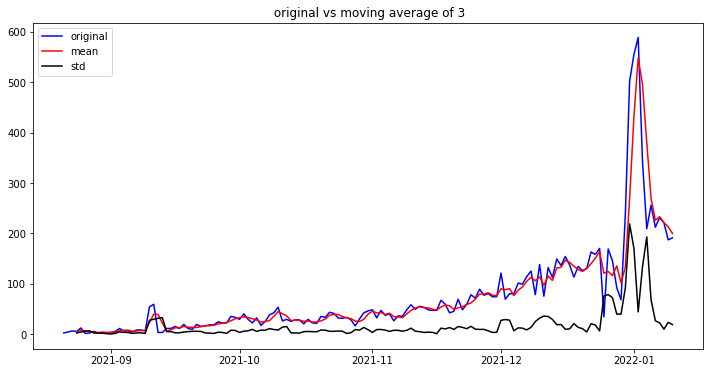

In [358]:
plt.figure(figsize=(12,6))
original = plt.plot(df,color = "blue",label = "original")
mean_graph = plt.plot(mv_avg_3,color = "red",label = "mean")
std_graph= plt.plot(mv_std_3,color = "black",label = "std")
plt.legend(loc="best")
plt.title(" original vs moving average of 3")
plt.show()

In [359]:
# Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")

df_test = adfuller(df['order_count'],autolag = 'AIC')

df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)' %key] = value
    
print(df_output)    
    

Results of Dickey Fuller Test
Test Statistic                   3.216372
p-value                          1.000000
Lags Used                       14.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


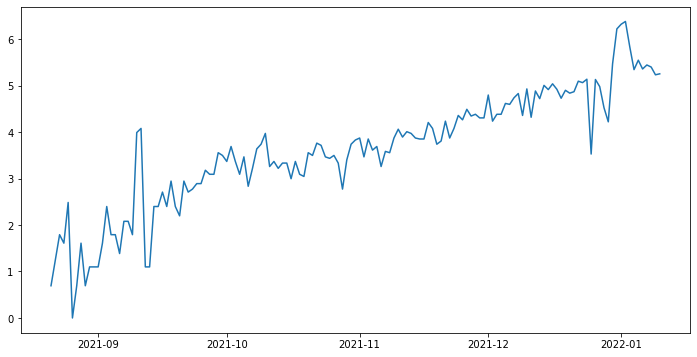

In [360]:
plt.figure(figsize=(12,6))
df_log = np.log(df)
plt.plot(df_log)
plt.show()

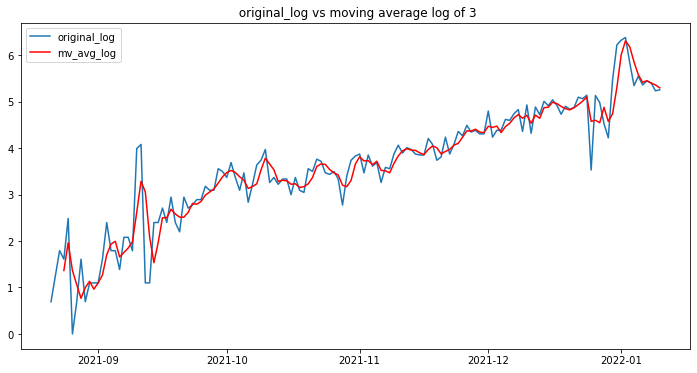

In [361]:
plt.figure(figsize= (12,6))
mv_avg_log = df_log.rolling(window = 3).mean()
mv_std_log = df_log.rolling(window = 3).std()

plt.plot(df_log,label = 'original_log')
plt.plot(mv_avg_log,color = 'red',label = 'mv_avg_log')
plt.legend(loc="best")
plt.title(" original_log vs moving average log of 3")

plt.show()

In [362]:
diff_log = (df_log)-(mv_avg_log)
diff_log.head(5)

,order_count
order_dt,
2021-08-21,NaN
2021-08-23,NaN
2021-08-24,0.244656
2021-08-25,0.522872
2021-08-26,-1.364782


In [363]:
diff_log.dropna(inplace = True)
diff_log.head()

,order_count
order_dt,
2021-08-24,0.244656
2021-08-25,0.522872
2021-08-26,-1.364782
2021-08-27,-0.366204
2021-08-28,0.841910


In [364]:
diff_log.describe()

,order_count
count,140.000000
mean,0.027283
std,0.370458
min,-1.956432
25%,-0.103483
50%,0.032254
75%,0.173009
max,1.368922


In [365]:
def test_stationarity(timeseries):
    mv_avg_3 = timeseries.rolling(window = 3).mean()
    mv_std_3 = timeseries.rolling(window = 3).std()
    
    plt.figure(figsize=(12,6))
    original = plt.plot(timeseries,color = "blue",label = "original")
    mean_graph = plt.plot(mv_avg_3,color = "red",label = "mean")
    std_graph= plt.plot(mv_std_3,color = "black",label = "std")
    plt.legend(loc="best")
    plt.title(" original vs moving average of 3")
    plt.show()
    
    
    print("Results of Dickey Fuller Test")

    df_test = adfuller(timeseries['order_count'],autolag = 'AIC')

    df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    
    print(df_output)    

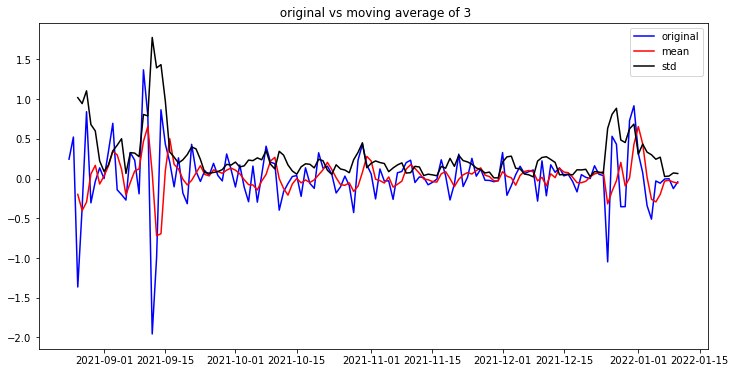

Results of Dickey Fuller Test
Test Statistic                  -4.810711
p-value                          0.000052
Lags Used                       14.000000
Number of Observations Used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64


In [366]:
test_stationarity(diff_log)

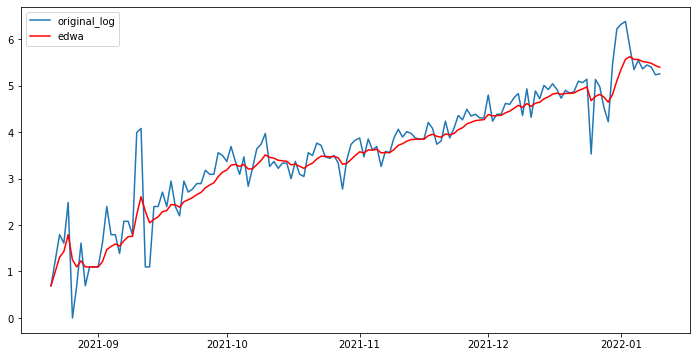

In [367]:
edwa = df_log.ewm(halflife = 3,min_periods = 0,adjust = True).mean()

plt.figure(figsize=(12,6))
plt.plot(df_log,label = 'original_log')
plt.plot(edwa,color = 'red',label = 'edwa')


plt.legend(loc="best")
plt.show()

In [368]:
diff_edwa = df_log - edwa

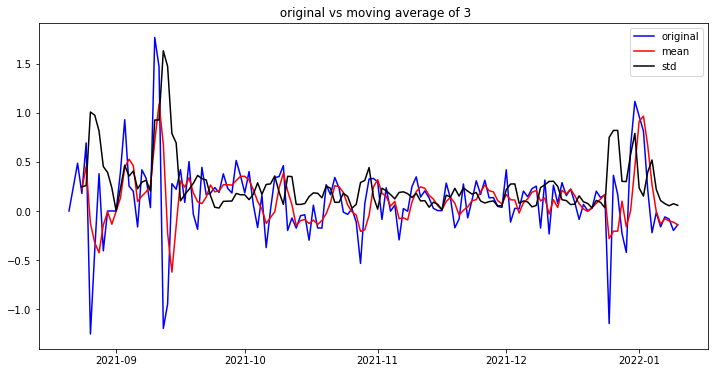

Results of Dickey Fuller Test
Test Statistic                -9.038959e+00
p-value                        5.196073e-15
Lags Used                      1.000000e+00
Number of Observations Used    1.400000e+02
Critical Value (1%)           -3.477945e+00
Critical Value (5%)           -2.882416e+00
Critical Value (10%)          -2.577902e+00
dtype: float64


In [369]:
test_stationarity(diff_edwa)

In [370]:
diff_log_shift = df_log - df_log.shift()

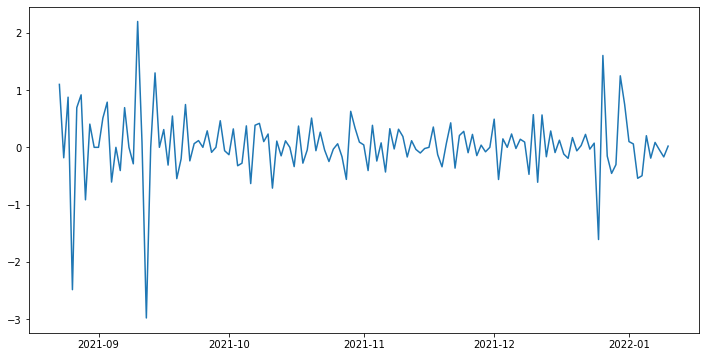

In [371]:
plt.figure(figsize=(12,6))
plt.plot(diff_log_shift)
plt.show()

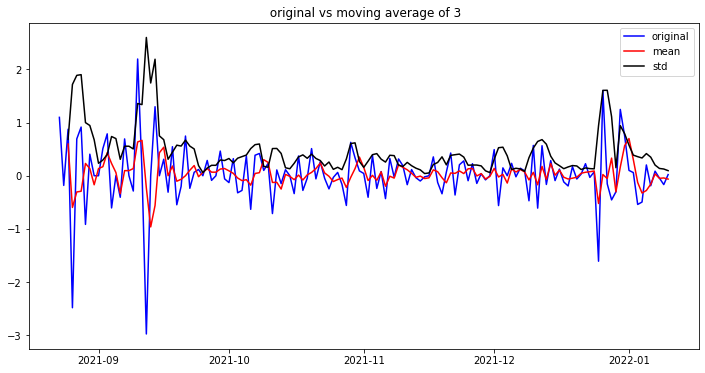

Results of Dickey Fuller Test
Test Statistic                -8.193986e+00
p-value                        7.535290e-13
Lags Used                      5.000000e+00
Number of Observations Used    1.350000e+02
Critical Value (1%)           -3.479743e+00
Critical Value (5%)           -2.883198e+00
Critical Value (10%)          -2.578320e+00
dtype: float64


In [372]:
diff_log_shift.dropna(inplace = True)
test_stationarity(diff_log_shift)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


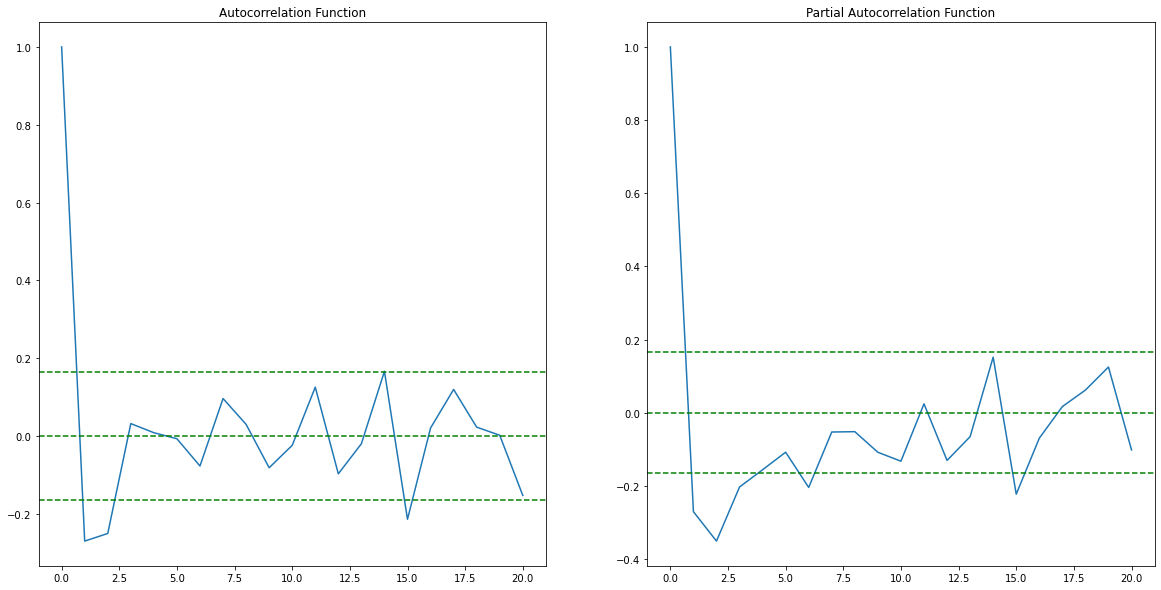

In [373]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(diff_log_shift,nlags=20)
lag_pacf=pacf(diff_log_shift,nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(diff_log_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff_log_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(diff_log_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff_log_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

plotting ARIMA model


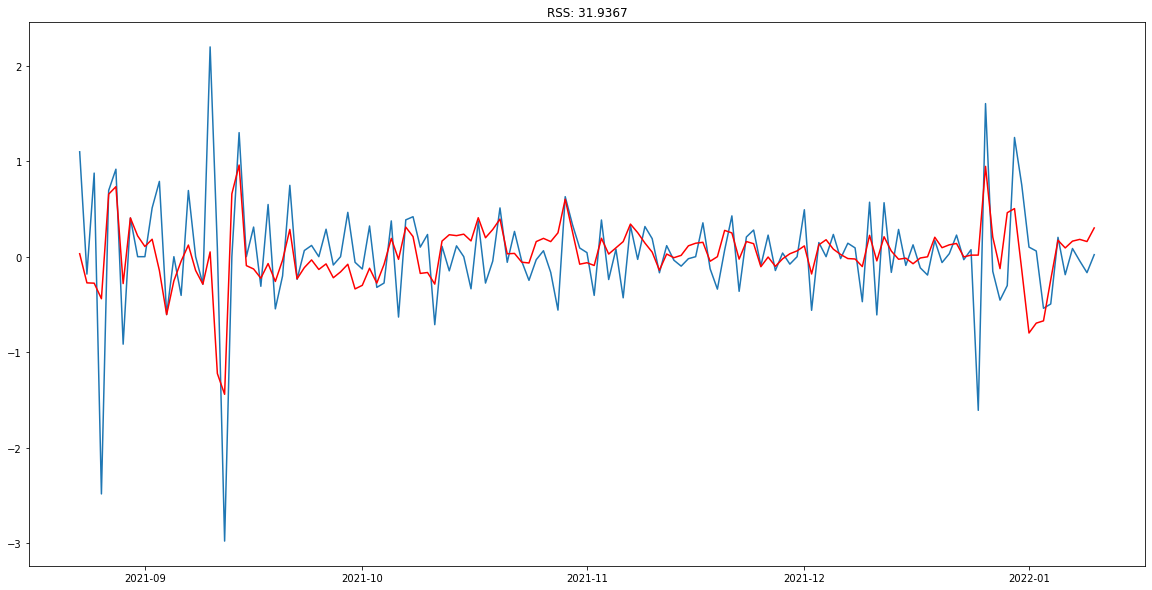

In [401]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(df_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(diff_log_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-diff_log_shift['order_count'])**2))
print('plotting ARIMA model')
plt.show()

In [402]:
predictions_diff=pd.Series(results.fittedvalues, copy=True)
print(predictions_diff.head())

order_dt
2021-08-23    0.030951
2021-08-24   -0.274237
2021-08-25   -0.277359
2021-08-26   -0.440177
2021-08-27    0.655127
dtype: float64


In [403]:
predictions_diff_cum_sum=predictions_diff.cumsum()
print(predictions_diff_cum_sum.head())

order_dt
2021-08-23    0.030951
2021-08-24   -0.243286
2021-08-25   -0.520645
2021-08-26   -0.960822
2021-08-27   -0.305695
dtype: float64


In [404]:
predictions_log=pd.Series(df_log['order_count'], index=df_log.index)
predictions_log=predictions_log.add(predictions_diff_cum_sum,fill_value=0)
predictions_log.head()

order_dt
2021-08-21    0.693147
2021-08-23    1.822711
2021-08-24    1.366152
2021-08-25    1.964262
2021-08-26   -0.960822
dtype: float64

In [405]:
df_log

,order_count
order_dt,
2021-08-21,0.693147
2021-08-23,1.791759
2021-08-24,1.609438
2021-08-25,2.484907
2021-08-26,0.000000
...,...
2022-01-06,5.356586
2022-01-07,5.442418
2022-01-08,5.398163


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<Figure size 7200x7200 with 0 Axes>

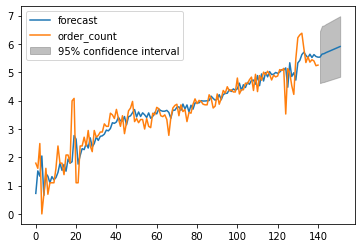

In [406]:
plt.figure(figsize=(100,100))
results.plot_predict(1,152)
x=results.forecast(steps=10)
plt.show()

In [407]:
x[0]

array([5.53356705, 5.6401052 , 5.65585132, 5.69402208, 5.72222884,
       5.75427101, 5.78479282, 5.81591353, 5.84679801, 5.87777564])

In [408]:
np.exp(x[0])

array([253.04492659, 281.49232911, 285.95982142, 297.0861242 ,
       305.58526482, 315.53544249, 325.31463585, 335.59783806,
       346.12431768, 357.01422997])